## Importación de librerías

In [ ]:
# Data processing  
# -----------------------------------------------------------------------  
import numpy as np  
import pandas as pd  

# Graphics  
# -----------------------------------------------------------------------  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

## Carga de datos

In [2]:
df = pd.read_csv('../data/raw/autorenew.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


### Fechas

Primero, convertimos las fechas a formato `datetime`

Tenemos 2 opciones:

* Cargar el conjunto de datos parseando las fechas directamente:

```python
df = pd.read_csv('../data/raw/autorenew.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
```

* Convertir manualmente las columnas de fecha:

```python
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   vehicleType          237765 non-null  object        
 6   yearOfRegistration   371528 non-null  int64         
 7   gearbox              351319 non-null  object        
 8   powerCV              371528 non-null  float64       
 9   model                351044 non-null  object        
 10  kilometer            371528 non-null  int64         
 11  monthOfRegistration  371528 non-null  int64         
 12  fuelType             338142 non-null  object        
 13  brand         

### Columnas del dataset

- ``dateCrawled``: Fecha y hora en la que se recopilaron los datos del coche.

- ``name``: Nombre del anuncio, normalmente incluye la marca y el modelo del coche.

- ``seller``: Tipo de vendedor (particular o concesionario).

- ``offerType``: Tipo de oferta (venta o subasta).

- ``price``: Precio del coche en la moneda local (probablemente euros o dólares).

- ``vehicleType``: Tipo de vehículo (sedán, SUV, compacto, etc.).

- ``yearOfRegistration``: Año en el que se matriculó el coche.

- ``gearbox``: Tipo de transmisión (manual o automática).

- ``powerCV``: Potencia del coche en caballos de vapor (CV).

- ``model``: Modelo específico del coche.

- ``kilometer``: Kilometraje total del coche.

- ``monthOfRegistration``: Mes en el que se matriculó el coche.

- ``fuelType``: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- ``brand``: Marca del coche.

- ``notRepairedDamage``: Indica si el coche tiene daños sin reparar.

- ``dateCreated``: Fecha en la que se creó el anuncio.

- ``nrOfPictures``: Número de fotos en el anuncio.

- ``postalCode``: Código postal de la ubicación del coche.

- ``lastSeen``: Última fecha y hora en la que se visualizó el anuncio.

### Análisis de fechas

Comprobemos los valores únicos de los años para ver el intervalo de tiempo con el que estamos tratando (también podemos hacer un `.min()` o `.max()`)

In [5]:
dates = ['dateCrawled', 'dateCreated', 'lastSeen']

for date in dates:
    print(f"Unique year values for {date}: {df[date].dt.year.unique().tolist()}")

Unique year values for dateCrawled: [2016]
Unique year values for dateCreated: [2016, 2015, 2014]
Unique year values for lastSeen: [2016]


Vemos que los datos se extrajeron exclusivamente en 2016, mientras que los anuncios son únicamente de entre 2014 y 2016. Por lo tanto, asumiremos simplemente que los vehículos más nuevos solo pueden ser de 2016, en lugar del año actual. Más allá de eso, estas columnas no aportan valor adicional, así que las eliminaremos.

In [6]:
df.drop(columns=['dateCrawled', 'dateCreated', 'lastSeen'], inplace=True)

## Duplicados

Ahora que hemos eliminado las fechas, comprobemos los duplicados. Es posible que un mismo vehículo haya sido registrado múltiples veces en diferentes fechas.

In [7]:
df.duplicated().sum()

np.int64(6624)

Efectivamente tenemos duplicados, vamos a eliminarlos

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

## Nulos

Comprobemos el total de nulos que tenemos en nuestro conjunto de datos

In [10]:
nulos = df.isna().sum() 

# Podemos mostrar solo las columnas con nulos
nulos[nulos>0]

vehicleType          131462
gearbox               19806
model                 20294
fuelType              33084
notRepairedDamage     70776
dtype: int64

Para ver si son muchos o pocos, veamos el porcentaje.

In [11]:
nulos_porc = df.isna().mean() * 100

nulos_porc[nulos_porc>0].round(2)

vehicleType          36.03
gearbox               5.43
model                 5.56
fuelType              9.07
notRepairedDamage    19.40
dtype: float64

Vemos que tenemos pocas columnas con valores nulos, de las cuales:

* `gearbox` y `model`: apenas es un 5%, pocos nulos

* `fuelType`: un 9%, pocos nulos

* `notRepairedDamage`: un 19% de nulos, cantidad moderada

* `vehicleType`: un 36%, cantidad alta

Deberemos gestionar adecuadamente los nulos, especialmente de columnas críticas como `notRepairedDamage`.

## Variables numéricas

In [12]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,364904.0,17502.27,3620372.48,0.0,1150.0,2950.0,7150.0,2.147484e+09
yearOfRegistration,364904.0,2004.58,93.55,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,364904.0,113.93,190.97,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,364904.0,125685.07,40090.32,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,364904.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,364904.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,364904.0,50944.55,25775.64,1067.0,30655.0,49688.0,71642.0,9.999800e+04


**Observaciones rápidas:**

- **``price``**: El precio mínimo es 0, lo cual es extraño, ya que un coche gratis no tiene sentido. Además, la media es mucho mayor que la mediana, lo que podría indicar la presencia de numerosos valores atípicos, posiblemente vehículos de lujo. Sin embargo, el precio máximo alcanza un orden de magnitud de 1e9 (mil millones), lo cual es claramente imposible y probablemente se deba a errores.

- **``yearOfRegistration``**: El valor mínimo es 1000, lo cual es ilógico, ya que los coches no existían antes de 1900 (y los vehículos tan antiguos rara vez se venden). Además, hay valores como 9999, que probablemente sean errores de introducción de datos.

- **``powerCV``**: Un valor mínimo de 0 es poco probable, y un máximo de 19.700 CV es irreal, dado que incluso los coches de carreras más potentes rara vez superan los 1.000 CV. El resto de valores parecen razonables, con la mayoría situándose en el rango típico de entre 50 y 150 CV.

- **``kilometer``**: Estos valores parecen razonables. Además, la media y la mediana son similares, lo que sugiere una distribución más uniforme.

- **``monthOfRegistration``**: Esta variable es verdaderamente categórica. El valor mínimo, 0, es imposible, pero los valores entre 1 y 12 son lógicos y coherentes.

- **``nrOfPictures``**: Todas las entradas tienen un valor de 0. La eliminamos.

- **``postalCode``**: Esta variable corresponde a códigos postales y podría tratarse como categórica. Sin embargo, no hay información sobre el país al que pertenecen ni una forma de determinarlo, lo que limita su utilidad para el análisis. Por el nombre de algunas entradas, sospechamos que podría ser Alemania, pero no hay forma de confirmarlo. Por ello, decidimos eliminarla.

In [13]:
df.drop(columns=['postalCode', 'nrOfPictures'], inplace=True)

In [14]:
columnas_numericas = df.select_dtypes(include='number').columns

In [15]:
columnas_numericas

Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer',
       'monthOfRegistration'],
      dtype='object')

### Histogramas

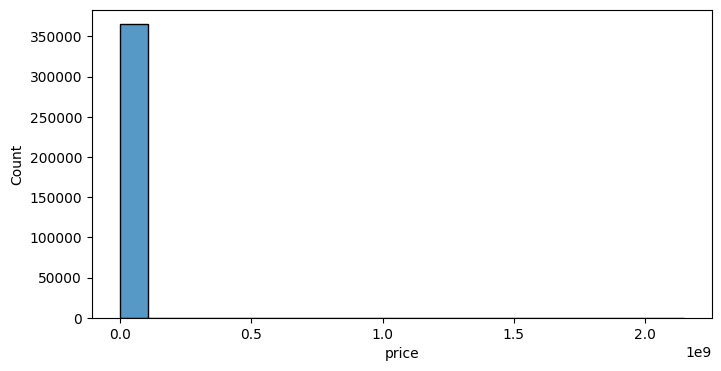

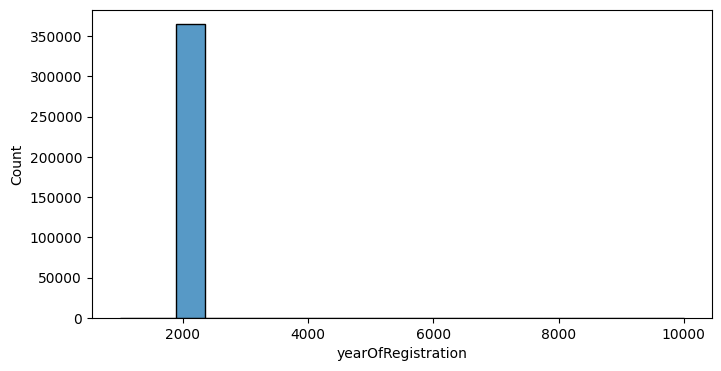

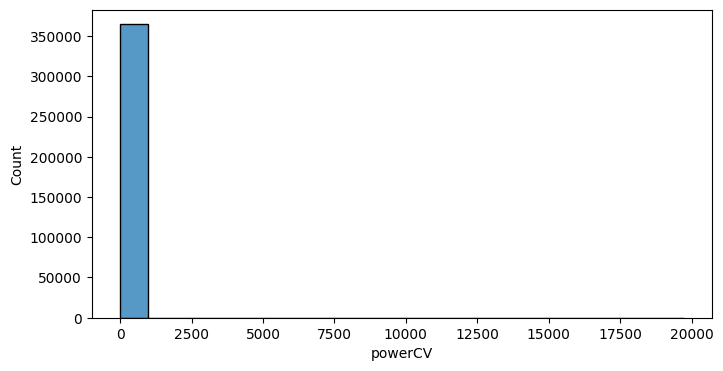

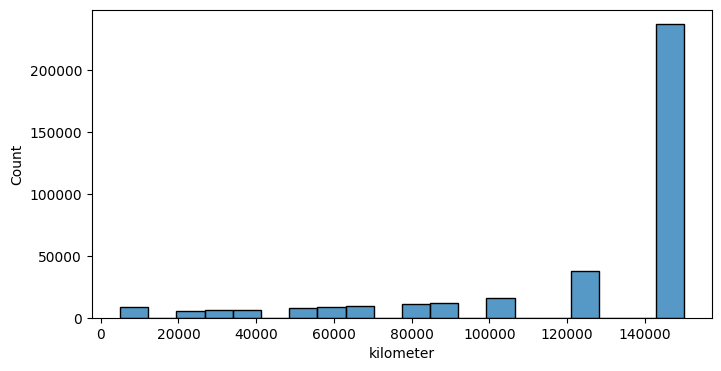

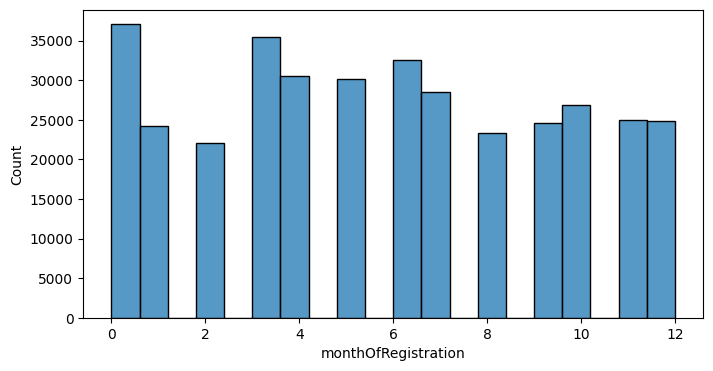

In [16]:
for columna in columnas_numericas:

    plt.figure(figsize=(8, 4))
    sns.histplot(df[columna], bins=20)
    plt.show()

### Boxplot

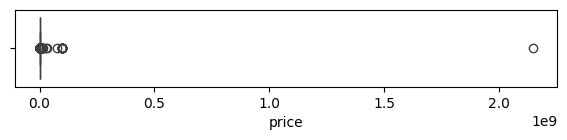

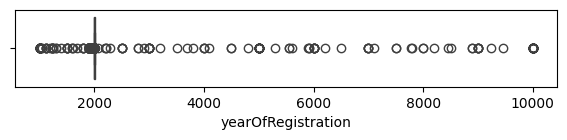

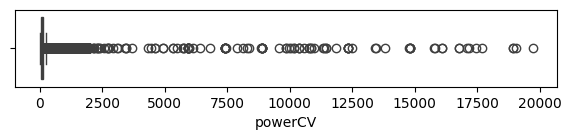

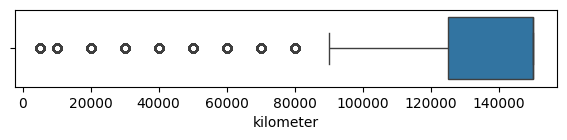

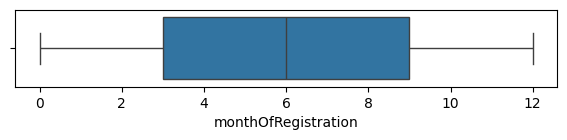

In [17]:
for columna in columnas_numericas:

    plt.figure(figsize=(7, 1))
    sns.boxplot(x=df[columna])
    plt.show()

## Variables categóricas

In [18]:
df.describe(include=['object', 'category']).T.round(2)

,count,unique,top,freq
name,364904,233531,Ford_Fiesta,650
seller,364904,2,private,364901
offerType,364904,2,offer,364892
vehicleType,233442,7,small car,78621
gearbox,345098,2,manually,269737
model,344610,251,golf,29539
fuelType,331820,7,petrol,220299
brand,364904,40,volkswagen,78227
notRepairedDamage,294128,2,no,258291


In [19]:
columnas_categoricas = df.select_dtypes(include=['category', 'object']).columns

columnas_categoricas

Index(['name', 'seller', 'offerType', 'vehicleType', 'gearbox', 'model',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [20]:
for columna in columnas_categoricas:

    print(f"\nValores únicos de la columna {columna}:")
    display(df[columna].value_counts(dropna=False))


Valores únicos de la columna name:


name
Ford_Fiesta                                           650
BMW_318i                                              623
Opel_Corsa                                            614
Volkswagen_Golf_1.4                                   598
BMW_316i                                              515
                                                     ... 
Ford_Focus_mit_Klimaanlage                              1
BMW_520_i___Unfallwagen_zum_Ausschlachten               1
Ford_Focus_1.6_Kombi_2006__Tuev_bis_Maerz_2017_AHK      1
Seat_Ibiza_Cupra__1.9_TDI_160_PS__Gruene_Plakette       1
BMW_M135i_vollausgestattet_NP_52.720____Euro            1
Name: count, Length: 233531, dtype: int64


Valores únicos de la columna seller:


seller
private       364901
commercial         3
Name: count, dtype: int64


Valores únicos de la columna offerType:


offerType
offer      364892
request        12
Name: count, dtype: int64


Valores únicos de la columna vehicleType:


vehicleType
NaN            131462
small car       78621
combi           66264
bus             29640
convertible     22592
coupe           18757
suv             14249
other            3319
Name: count, dtype: int64


Valores únicos de la columna gearbox:


gearbox
manually     269737
automatic     75361
NaN           19806
Name: count, dtype: int64


Valores únicos de la columna model:


model
golf               29539
andere             26078
NaN                20294
3er                20286
polo               12930
                   ...  
kalina                 8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: count, Length: 252, dtype: int64


Valores únicos de la columna fuelType:


fuelType
petrol     220299
diesel     105088
NaN         33084
lpg          5287
cng           561
hybrid        275
other         207
electro       103
Name: count, dtype: int64


Valores únicos de la columna brand:


brand
volkswagen        78227
bmw               39567
opel              39359
mercedes_benz     34681
audi              32144
ford              25092
renault           17651
peugeot           10805
fiat               9511
seat               6908
mazda              5593
skoda              5548
smart              5196
citroen            5117
nissan             4955
toyota             4617
sonstige_autos     3937
hyundai            3583
mini               3342
volvo              3255
mitsubishi         3015
honda              2804
kia                2498
alfa_romeo         2307
suzuki             2300
porsche            2186
chevrolet          1818
chrysler           1436
dacia               890
jeep                794
daihatsu            791
subaru              773
land_rover          763
jaguar              616
trabant             585
daewoo              533
saab                523
rover               482
lancia              479
lada                223
Name: count, dtype: int64


Valores únicos de la columna notRepairedDamage:


notRepairedDamage
no     258291
NaN     70776
yes     35837
Name: count, dtype: int64

### Countplot

Columna name con demasiados valores únicos: 233531
Distribución de la columna seller


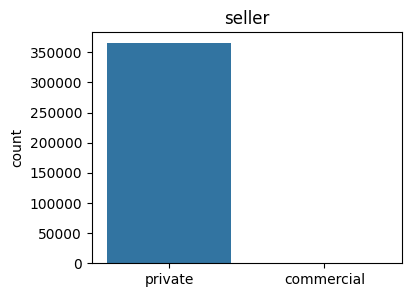

Distribución de la columna offerType


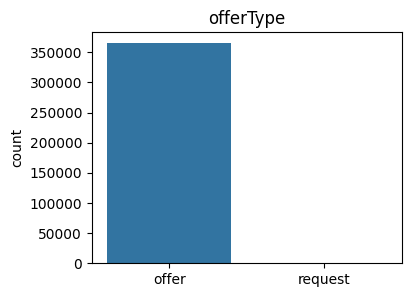

Distribución de la columna vehicleType


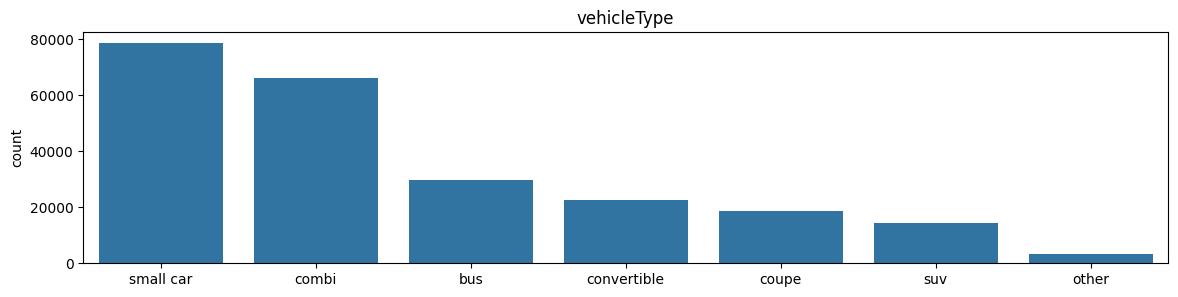

Distribución de la columna gearbox


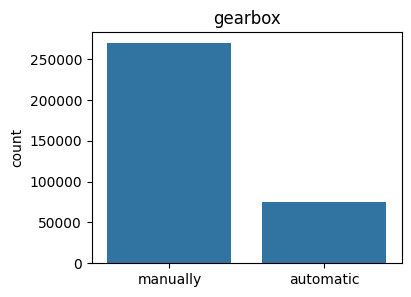

Distribución de la columna model


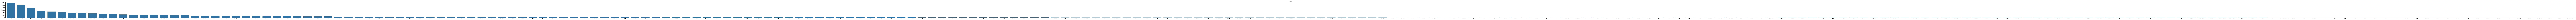

Distribución de la columna fuelType


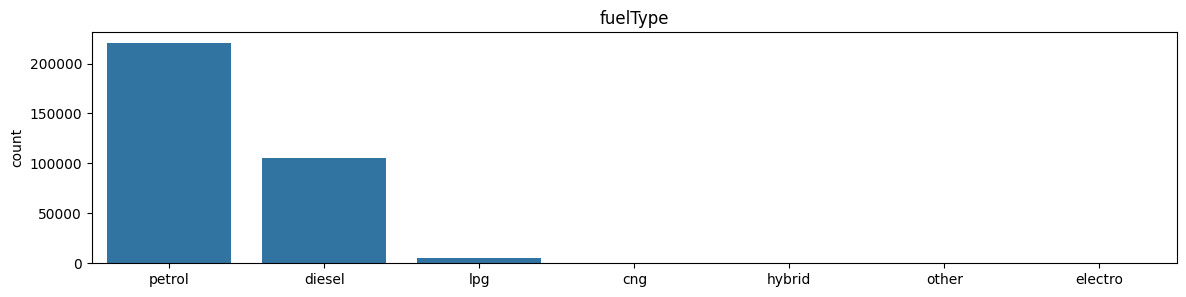

Distribución de la columna brand


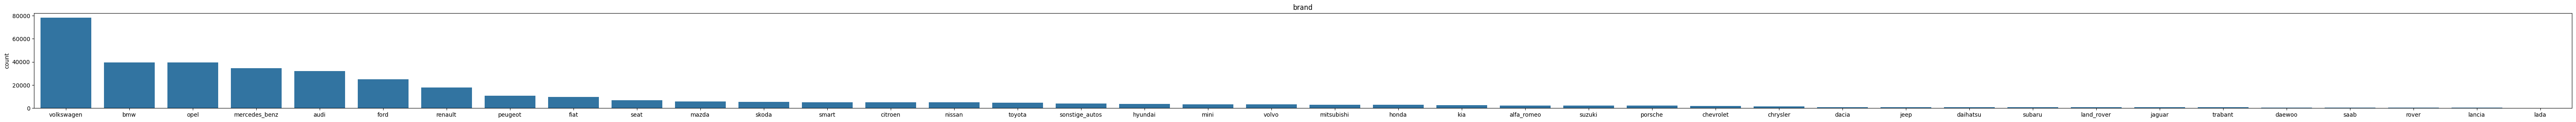

Distribución de la columna notRepairedDamage


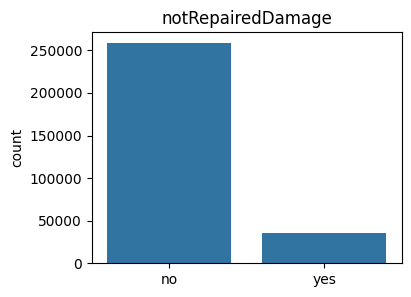

In [21]:
for columna in columnas_categoricas:

    n_cat = df[columna].nunique()

    if n_cat > 300:
        print(f"Columna {columna} con demasiados valores únicos: {n_cat}")
        continue

    print(f"Distribución de la columna {columna}")
    plt.figure(figsize=(n_cat * 2, 3))
    sns.countplot(x=df[columna], order=df[columna].value_counts().index)
    plt.title(columna)
    plt.xlabel('')
    plt.show()